# Projekt PzaP

Ime: Marko Škalić
Tema: Predviđanje akademskog uspjeha studenta
Github repozitorij: https://github.com/mskalic20/pzap-repo-skalic

###  Uvod
Za studentsko doba se govori kako je najljepše vrijeme života. Mada jesmo mladi i bezbrižni ipak je to doba kada trebamo početi ozbiljno razmišljati o budućnosti. To je vrijeme kada se mnogi osamostaljuju, pogotovo ako studiraju van rodnog mjesta. To je vrijeme kada moramo naučiti balansirati mnogo obveza u isto vrijeme. Upravo je studentsko doba doba kada se postaje odrasla osoba.

Motivacija za ovu temu bila mi je da utvrdim neki prosjek studenata koji upišu fakulte i isti završe ili ispišu. Također me zanima koji sve faktori mogu biti ključni u tome. 

Cilj teme je utvrditi akademski uspjeh odnosno neuspjeh studenta na temelju različitih faktora, koji su nam ponuđeni u glavnom datasetu. Osim toga analizirat ću i dokumentirati do kakvih promjena dolazi pri dodavanju novih faktora koji mogu utjecati na akademske mogućnosti studenta. Probati ću razumjeti postoje li neke povezanosti među studentima koji odustanu od fakulteta te onih koji isti završe.

Dataset koji sam preuzeo je sljedeći: https://www.kaggle.com/code/yumnabilaf/predict-students-dropout
U originalnom datasetu su podaci od 4424 studenta, kroz 30 različitih faktora.
Ja sam smanjio to na 9 faktora koji su se meni činili najrelevantniji, te sam također smanjio broj studenata na 500, jer sam generirao nove faktore za prvih 500 studenata kako bi vidjeli da li ima kakvih sličnosti što se tiče razloga odustajanja.

 

In [1]:
pip install pandas matplotlib seaborn scikit-learn jupyter

Note: you may need to restart the kernel to use updated packages.


## Implementacija

In [2]:
import pandas as pd

df_studenti = pd.read_csv(r'C:\Users\Marko\Desktop\Studenti PzaP\studenti.csv')
df_studenti.head()


,ID,Marital status,Course,Daytime/evening attendance,Educational special needs,Debtor,Gender,Scholarship holder,International,Target
0,1,1,2,1,0,0,1,0,0,Dropout
1,2,1,11,1,0,0,1,0,0,Graduate
2,3,1,5,1,0,0,1,0,0,Dropout
3,4,1,15,1,0,0,0,0,0,Graduate
4,5,2,3,0,0,0,0,0,0,Graduate


što svaki stupac i vrijednosti označavaju:
ID - primarni ključ studenta
Marital status - 1—Single, 2—Married, 3—Widower, 4—Divorced, 5-Facto union, 6—Legally separated (status veze)

Course - 1—Biofuel Production Technologies, 2—Animation and Multimedia Design, 3—Social Service (evening attendance), 4—Agronomy, 5—Communication Design, 6—Veterinary Nursing, 7—Informatics Engineering, 8—Equiniculture, 9—Management, 10—Social Service, 11—Tourism, 12—Nursing, 13—Oral Hygiene, 14—Advertising and Marketing Management, 15—Journalism and Communication, 16—Basic Education, 17—Management (evening attendance) (smjer na fakultetu)

Daytime/evening attendance - 1—daytime, 0—evening (jesu li predavanja po danu ili po noći)
Educational special needs - 1-yes, 0-no (da li je student sa posebnim potrebama)
Debtor - 1-yes, 0-no (da li je u dugovima ili nije)
Gender - 1-male, 0-female
Scholarship holder - 1-yes, 0-no (prima li stipendiju)
International - 1-yes, 0-no (da li je internacionalni student)
Target - Dropout, Graduated, Enrolled (dropout znači da je odustao od faksa, Graduated da je završio i diplomirao, a Enrolled znači da je još na fakultetu)

Mislim da je svaki stupac i njegove vrijednosti prilično sam po sebi razumljivo

In [3]:
df_novosti = pd.read_json(r'C:\Users\Marko\Desktop\Studenti PzaP\novi_stupci.json')
df_novosti.head()

,ID,izvannastavna_aktivnost,nepolozeni_ispiti,predavanja
0,1,0,4,1
1,2,0,1,0
2,3,1,4,0
3,4,1,5,1
4,5,0,2,0


što svaki stupac i vrijednosti označavaju:
ID - primarni ključ studenta
izvannastavna_aktivnost - 1-yes, 0-no (ima li kakve izvannastavne aktivnosti)
nepolozeni_ispiti - broj nepolozenih ispita od 0-5 (koliko ima nepolozenih ispita)
predavanja - 1-yes, 0-no (ide li na predavanja)

### Spajanje datoteka

In [4]:
df_spojeno = pd.merge(df_studenti, df_novosti, on='ID', how='left')
df_spojeno.head()


,ID,Marital status,Course,Daytime/evening attendance,Educational special needs,Debtor,Gender,Scholarship holder,International,Target,izvannastavna_aktivnost,nepolozeni_ispiti,predavanja
0,1,1,2,1,0,0,1,0,0,Dropout,0,4,1
1,2,1,11,1,0,0,1,0,0,Graduate,0,1,0
2,3,1,5,1,0,0,1,0,0,Dropout,1,4,0
3,4,1,15,1,0,0,0,0,0,Graduate,1,5,1
4,5,2,3,0,0,0,0,0,0,Graduate,0,2,0


Za početak možemo na jednostavnom grafu prikazati raspodjelu naših ciljanih podataka, odnosno prikazati koliko studenata spada u koju kategoriju.

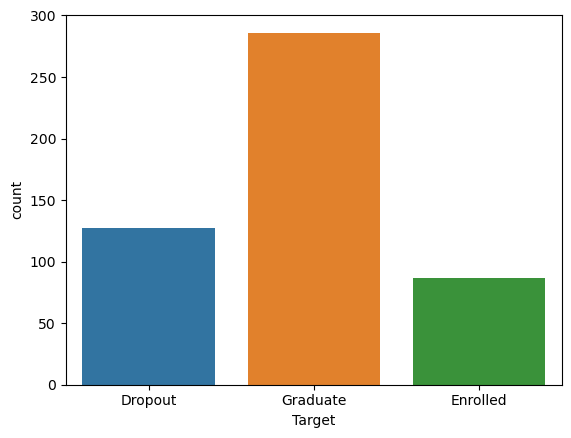

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Target', data=df_spojeno)
plt.show()


Stupac 'Target' sadrži potadke u obliku stringa te se ne može koristiti direktno u analizama gdje su nam potrebni brojčani podaci.
Zbog toga je potrebno pretvoriti te vrijednosti u brojčane.
Kako bismo to napravili koristimo LabelEncoder
Ovime svaka kategorija dobiva svoj broj, u našem slučaju
Dropout = 0
Enrolled = 1
Graduated = 2

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_spojeno['Target_encoded'] = label_encoder.fit_transform(df_spojeno['Target'])
df_spojeno.head(20)


,ID,Marital status,Course,Daytime/evening attendance,Educational special needs,Debtor,Gender,Scholarship holder,International,Target,izvannastavna_aktivnost,nepolozeni_ispiti,predavanja,Target_encoded
0,1,1,2,1,0,0,1,0,0,Dropout,0,4,1,0
1,2,1,11,1,0,0,1,0,0,Graduate,0,1,0,2
2,3,1,5,1,0,0,1,0,0,Dropout,1,4,0,0
3,4,1,15,1,0,0,0,0,0,Graduate,1,5,1,2
4,5,2,3,0,0,0,0,0,0,Graduate,0,2,0,2
5,6,2,17,0,0,1,1,0,0,Graduate,0,2,0,2
6,7,1,12,1,0,0,0,1,0,Graduate,1,4,1,2
7,8,1,11,1,0,0,1,0,0,Dropout,1,3,0,0
8,9,1,10,1,0,0,0,1,1,Graduate,1,2,1,2
9,10,1,10,1,0,1,0,0,0,Dropout,0,3,1,0


Nadalje ćemo izbaciti stupac 'Target' koji koristi string vrijednosti jer smo napravili stupac 'Target_encoded' čiji će nam podaci dalje biti praktičniji za korištenje.

In [7]:
df_spojeno = df_spojeno.drop('Target', axis=1)
df_spojeno.head()


,ID,Marital status,Course,Daytime/evening attendance,Educational special needs,Debtor,Gender,Scholarship holder,International,izvannastavna_aktivnost,nepolozeni_ispiti,predavanja,Target_encoded
0,1,1,2,1,0,0,1,0,0,0,4,1,0
1,2,1,11,1,0,0,1,0,0,0,1,0,2
2,3,1,5,1,0,0,1,0,0,1,4,0,0
3,4,1,15,1,0,0,0,0,0,1,5,1,2
4,5,2,3,0,0,0,0,0,0,0,2,0,2


### Pohrana u bazu
Sada kada su podaci očišćeni i spojeni slijedi nam pohrana podataka
Koristiti ćemo relacijsku bazu podataka, i alat 'sqlite3'
Sqlite3 je super opcija jer je jednostavna i integrirana je s Pythonom, te nema potrebe za postavljanjem zasebnog serverskog okruženja

In [8]:
import sqlite3
conn = sqlite3.connect('studenti.db')
df_spojeno.to_sql('studenti', conn, if_exists='replace', index=False)
conn.close()


U gore navedenom kodu 'to_sql' metoda pohranjuje DataFrame 'df_spojeno' u tablicu studenti unutar SQLite baze podataka 'studenti.db'. 
Ako tablica već postoji, "if_exists='replace'" će je zamijeniti novim podacima. 
Opcija 'index=False' sprječava pohranjivanje indeksa DataFrame-a kao zasebnog stupca u bazi podataka.

### Izrada sučelja za pristup podacima
Nakon što smo pohranili podatke u bazu bilo bi dobro da imamo način kako tim podacima pristupiti.
To možemo učiniti uz pomoć jednostavnog sučelja.
Jedna metoda za to je izrada REST API-a. REST API omogućava komunikaciju sa bazom putem HTTP zahtjeva.
Za izradu nam je potreban web okvir. S obzirom da sam se upoznao sa Flaskom pri izradi projekta iz predmeta Uvod u umjetnu inteligenciju koristit ću isti i ovdje.
Prvi korak je instalacija

In [9]:
pip install flask

In [10]:
from flask import Flask, jsonify
import sqlite3

app = Flask(__name__)

@app.route('/students', methods=['GET'])
def get_students():
    with sqlite3.connect('studenti.db') as conn:
        conn.row_factory = sqlite3.Row
        cur = conn.cursor()
        cur.execute('SELECT * FROM studenti')
        student_rows = cur.fetchall()
        studenti = [dict(row) for row in student_rows]
    return jsonify(studenti)

if __name__ == '__main__':
    app.run(debug=True)



 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\Marko\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Vizualizacija podataka
U ovomo ćemo dijelu vizualizirati podatke kroz različite faktore, kako bismo pokušali odrediti postoje li zajednički čimbenici u odluci o odustajanju s fakulteta ili ostajanje na fakultetu.

Prvo što želim vidjeti je raspodjelu kroz tri glavne kategorije (Dropout, Enrolled i Graduated), vezano po spolu.

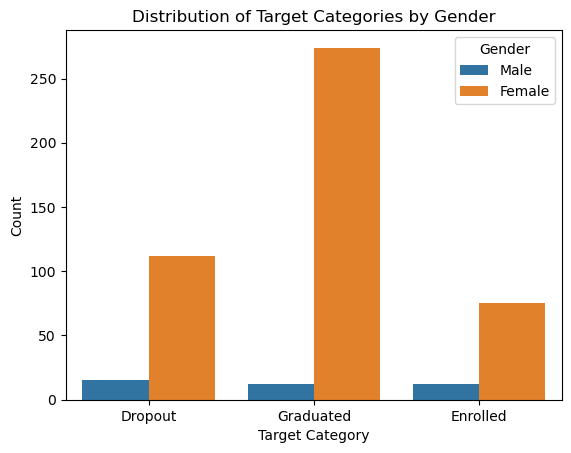

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gender_mapping = {1: 'Male', 0: 'Female'}
target_mapping = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduated'}

df_spojeno['Gender'] = df_spojeno['Gender'].map(gender_mapping)
df_spojeno['Target_encoded'] = df_spojeno['Target_encoded'].map(target_mapping)

sns.countplot(x='Target_encoded', hue='Gender', data=df_spojeno)
plt.title('Distribution of Target Categories by Gender')
plt.xlabel('Target Category')
plt.ylabel('Count')
plt.legend(title='Gender')

plt.show()

Malo se čini čudno da je toliko djevojaka, ali ako bismo pogledali skup od 500 ljudi vidjeli bismo da su stvarno velika većina djevojke
gender_mapping i target_mapping redovi služe kako bismo mogli brojčanoj vrijednosti u tablici spojiti string vrijednost, odnosno kako bismo na grafu te podatke mogli prikazati riječima

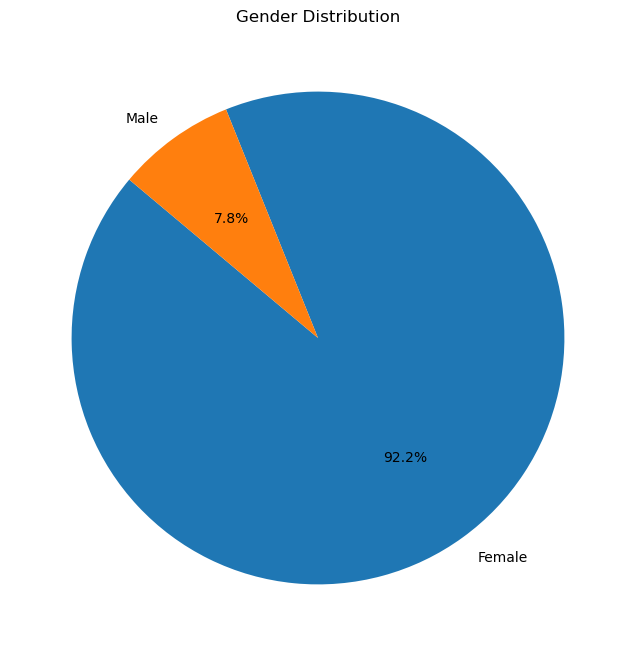

In [10]:
gender_counts = df_spojeno['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')

plt.show()

Evo kako bismo se skroz uvjerili da je stvarno ženska populacija prisutnija. Ovo bi značilo da je u skupu od 500 studenata 461 djevojka, te samo 39 muškaraca.

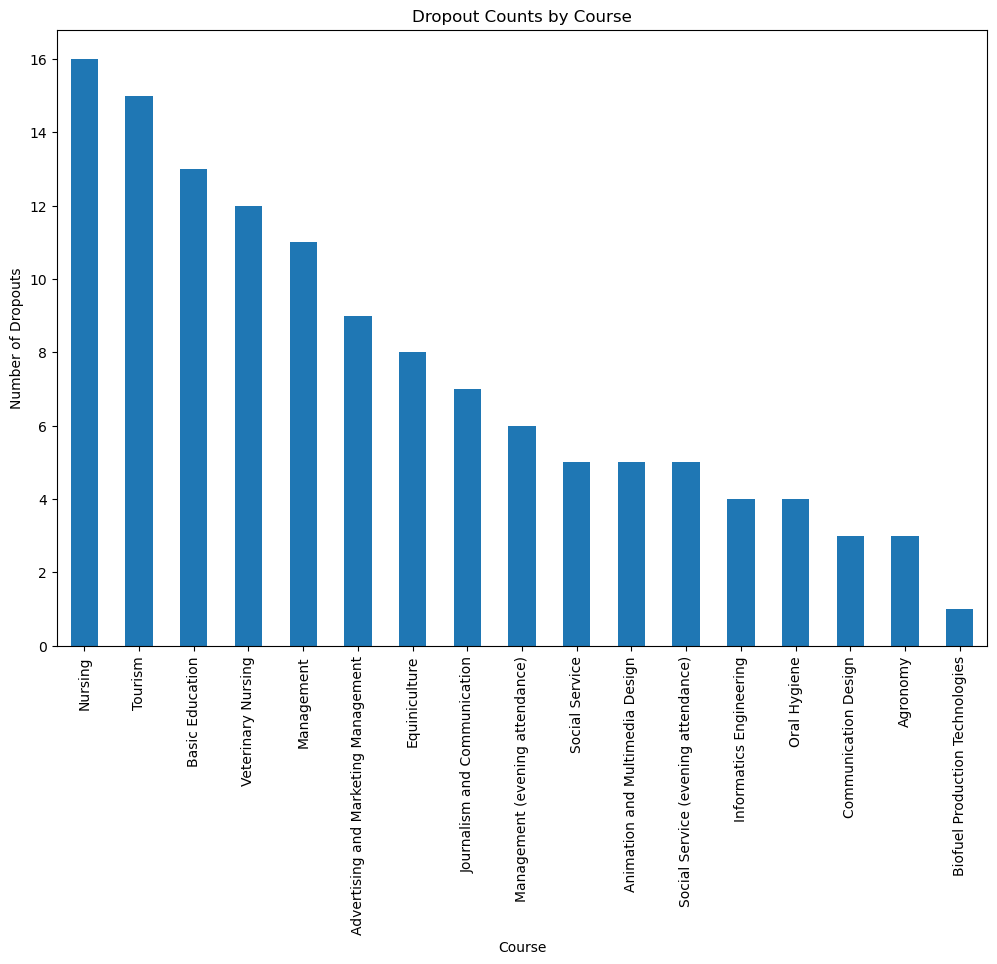

In [13]:

dropouts = df_spojeno[df_spojeno['Target_encoded'] == 'Dropout']
dropout_counts = dropouts['Course'].value_counts().sort_index()

course_mapping = {
    1: 'Biofuel Production Technologies', 2: 'Animation and Multimedia Design', 
    3: 'Social Service (evening attendance)', 4: 'Agronomy', 5: 'Communication Design', 
    6: 'Veterinary Nursing', 7: 'Informatics Engineering', 8: 'Equiniculture', 
    9: 'Management', 10: 'Social Service', 11: 'Tourism', 12: 'Nursing', 
    13: 'Oral Hygiene', 14: 'Advertising and Marketing Management', 
    15: 'Journalism and Communication', 16: 'Basic Education', 
    17: 'Management (evening attendance)'
}

dropout_counts.index = dropout_counts.index.map(course_mapping)

dropout_counts = dropout_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
dropout_counts.plot(kind='bar')
plt.title('Dropout Counts by Course')
plt.xlabel('Course')
plt.ylabel('Number of Dropouts')
plt.xticks(rotation=90)
plt.show()


Na predhodnome smo grafu pokazali koliko je osoba odustalo od pojedinog smjera na fakultetu.

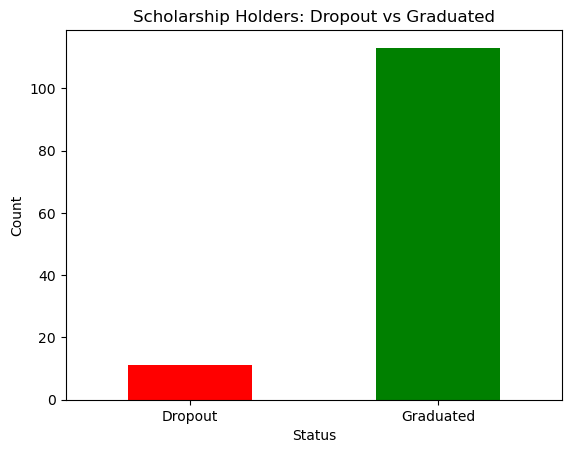

In [14]:
scholarship_holders = df_spojeno[df_spojeno['Scholarship holder'] == 1]
scholarship_status_counts = scholarship_holders['Target_encoded'].value_counts()
scholarship_status_counts = scholarship_status_counts[['Dropout', 'Graduated']]

scholarship_status_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Scholarship Holders: Dropout vs Graduated')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [15]:
scholarship_dropout_graduated_counts = df_spojeno[df_spojeno['Scholarship holder'] == 1]['Target_encoded'].value_counts()
scholarship_dropout_graduated_counts


Target_encoded
Graduated    113
Enrolled      18
Dropout       11
Name: count, dtype: int64

Iznad je vidljiv točan broj studenata koji primaju stipendiju te njihov status na fakultetu.

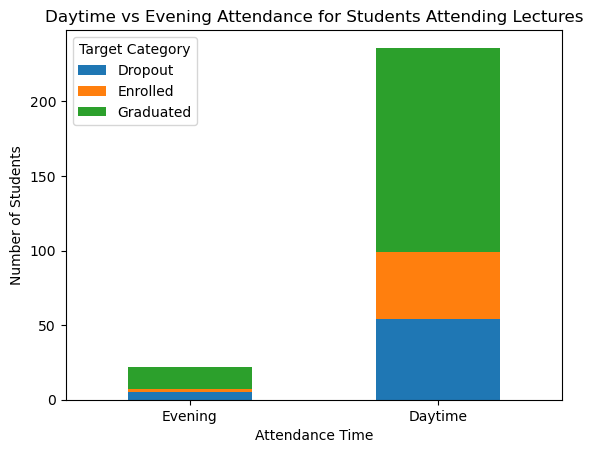

In [16]:
attended_lectures = df_spojeno[df_spojeno['predavanja'] == 1]
attendance_target_counts = attended_lectures.groupby(['Daytime/evening attendance', 'Target_encoded']).size().unstack()

attendance_target_counts = attendance_target_counts.fillna(0)

attendance_mapping = {1: 'Daytime', 0: 'Evening'}
attendance_target_counts.index = attendance_target_counts.index.map(attendance_mapping)

attendance_target_counts.plot(kind='bar', stacked=True)
plt.title('Daytime vs Evening Attendance for Students Attending Lectures')
plt.xlabel('Attendance Time')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.legend(title='Target Category')

plt.show()


Grafikon je podjeljen na dva dijela ovisno kada su se održavala predavanja (Po danu ili po noci). Također je u svakom stupcu vidljiva podjela studenata koji su prisustvovali predavanjima da li su Odustali od fakulteta, završili ili trenutno još idu na predavanja.

### Zaključak
Nije svaki fakultet za svakoga. Dakle postoje razni faktori koji mogu ljude natjerati da donesu neku odluku, kao što je odustajanje od fakulteta. 
Posebno mi je bila zanimljiva ova činjenica da postoji ograničen broj ljudi koji su primali stipendiju a, a svejedno su odustali od fakulteta. 
Također mi je zanimljiva i podjela po vremenu predavanja, te vidimo da postoje ljudi koji su imali predavanja navečer i išli na njih, ali kasnije odustali od fakulteta.

Kroz projekt, koristili smo različite metode obrade i vizualizacije podataka kako bismo istražili i interpretirali podatke. Od pretprocesiranja i integracije podataka iz više skupova, stvaranja baze podataka, analize podataka i njihove vizualizacije.

Nisam u projektu izradio sučelje za pristup podacima, jer mi se javljala greška te ju nisam trenutno znao popraviti.

# Literatura

[1] Realinho, V., Machado, J., Baptista, L., & Martins, M. V. (2022). Predicting student dropout and academic success. Data, 7(11), 146.
Materijali sa kolegija

## Alati
Generator skupa podataka https://generatedata.com/generator
ChatGpt
